# Exercise 3.1: 
Is it enough to insert the given solution into the equation? If not the soulution can be found by applying a Fourier transform to the diffusion equation (4K).
Possible physical interpretaion of h(y): This represents the initial distribution of the substance, as is obvious if the solution is shown using the Fourier transform. 

https://wiki.math.ntnu.no/_media/tma4120/2019h/heat2018.pdf

Skal vise at 

$\phi(x,t) = \frac{1}{\sqrt{4\pi Dt}} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}}$

Er en løsning av

$\frac{\partial \phi(x, t)}{\partial t} = D\frac{\partial^2\phi(x,t)}{\partial^2x}$.

Regner først ut

$\frac{\partial \phi(x, t)}{\partial t} = -\frac{1}{2} \frac{1}{\sqrt{4\pi Dt}} \frac{1}{t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}} + \frac{1}{\sqrt{4\pi Dt}} \frac{1}{t^2}\int^{+\infty}_{-\infty}dy\,h(y) \, \frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} = \frac{1}{\sqrt{4\pi Dt}}(\frac{1}{t^{2}} \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} - \frac{1}{2t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}})$.

Deretter finner vi

$\frac{\partial\phi(x,t)}{\partial x} = \frac{1}{\sqrt{4\pi Dt}} (-\frac{1}{4Dt}) \int^{+\infty}_{-\infty}dy\,h(y)\,(2x-2y)e^{-\frac{(x-y)^2}{4Dt}}$

$\implies \frac{\partial^2 \phi(x,t)}{\partial^2 x} = \frac{1}{\sqrt{4\pi Dt}}\frac{1}{4Dt}(-\int^{+\infty}_{-\infty}dy\,h(y)\,2e^{-\frac{(x-y)^2}{4Dt}} + \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(2x-2y)^2}{4Dt}e^{-\frac{(x-y)^2}{4Dt}}) = \frac{1}{D\sqrt{4\pi Dt}}(\frac{1}{t^{2}} \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} - \frac{1}{2t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}})$.

$\implies \frac{\partial \phi(x, t)}{\partial t} = D\frac{\partial^2\phi(x,t)}{\partial^2x}$ $$\tag*{$\blacksquare$}$$.


# Exercise 3.2:
The probability of finding an particle in position $x$ in a potential landscape $V(x)$ is given by $P(x) = Ze^{-\beta V(x)}$, where $Z$ is the canonical partition function of the system and $\beta = (k_b T)^{-1}$.

During a random walk the probability for a particle to move in positive direction, stay put or move in negative direction is $\{p^{+}, p^{0}, p^{-}\}$, and the sum of them must add up to one. That means the probabilities must satisfy the equation $p^{+} + p^{0} + p^{-} = 1$. We assume each of the probabilities are proportional to $P(x)$ and that the proportionality constant, $C$, is equal for all steps. If the position before a random walk step is $x_0$ we get $p^{+}=CP(x_0+1)$, $p^{0}=CP(x_0)$ and $p^{-}=CP(x_0-1)$. By putting these expressions in the equation above we find the constant $C=\frac{1}{P(x_0+1)+P(x_0)+P(x_0-1)}$ 
and find the desired probabilities:

$p^{+}=\frac{P(x_0+1)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0-1)-V(x_0+1)]}+e^{-\beta [V(x_0)-V(x_0+1)]}}$

$p^{0}=\frac{P(x_0)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0-1)-V(x_0)]}+e^{-\beta [V(x_0+1)-V(x_0)]}}$

$p^{-}=\frac{P(x_0-1)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0+1)-V(x_0-1)]}+e^{-\beta [V(x_0)-V(x_0-1)]}}$.

# Exercise 3.3:
Use the Taylor series expansion of $e = 1 + x + \frac{x²}{2} + ...$

* I would imagine that a very high temperature makes the probabilties equal. Therefore they should be $\frac13$ each. This makes sense with the Taylor series of $e \approx 1$ when $x<<1$.
* When $x>>1$ the probabilites go towards zero, if I am not mistaken. 

How can the random walk problem be simplified using an energy scale argument in the two limits?
* Limit 1: The difference in potentials when changing x is negligible if the temperature is very large
* Limit 2: If the temperature is very low, the diffusion stops? Absolute zero?

# Warm-up exercises:
* Start with 10000 particles at x = 0
* Each particle is subject to a random walk for 200 time steps
* Step length h = 1
* Time step $\Delta t = 1$

Pick a random number between 0 and 1. Walk in the directions that the probabilities dictate. 

## Programming exercise 4:

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 
from math import e
import random as rand
from numba import jit

#Lage skikkelige docstrings til alle funksjonene + sjekke at det brukes snake-case i all navngiving! (før innlevering)

# Probabililities from ex. 3 

@jit(nopython=True)
def p_plus(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0+1)))+e**(-beta_k*(V(x_0)-V(x_0+1))))

@jit(nopython=True)
def p_zero(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0)))+e**(-beta_k*(V(x_0+1)-V(x_0))))

@jit(nopython=True)
def p_minus(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0+1)-V(x_0-1)))+e**(-beta_k*(V(x_0)-V(x_0-1))))

#Constants for ex. 4
time_steps = 200
amount_of_particles = 1000  # --- skal egt ha 10 000?
beta_k = [0.01, 1, 100] # betaAndK = one value from the list beta_k
step_length = 1


#Makes Result with a potential V and value betaAndK. 
@jit(nopython=True)
def getResult(V, betaAndK):
    init = np.zeros((amount_of_particles,), dtype=np.int64)
    for step in range(time_steps):
        for position in range(len(init)):
             
                p = np.random.uniform(0,1)
                if p <= p_minus(init[position],V, betaAndK):
                    init[position] -= 1
                elif p >= (1-p_plus(init[position],V, betaAndK)):
                    init[position] += 1
    return init

#Plotting result
def plotResult(result):
  y = np.zeros(((max(result)-min(result))+1,),dtype=np.int64)
  for element in result:
    indeks = int(element-min(result))
    y[indeks] += 1   
  x = np.arange(min(result), max(result)+1, 1)
  plt.plot(x,y, label="Raw data")
  print(x,y)
  #Får ikke til scipy.fit!
  #mean, std = norm.fit(y)
  #pdf = norm.pdf(y, mean, std)
  #plt.plot(x, pdf, label="PDF")
  plt.legend()
  plt.show()

  #fig, axs = plt.subplots(1, 3, figsize=(10, 4), tight_layout=True)
  #axs[0].plot(x,y) #example on how to plot subplots, but need to do some changes to be able to plot all three of them
  #axs[1].plot(x,y) #Maybe hard to do in one general function like this
  #axs[2].plot(x,y)
  #plt.plot(x,y)
  #####plt.plot(x, norm.pdf(y)) #use norm to fit somehow
  #plt.show()

#Burde heller plottes i subplots til senere. 
# Mangler å fitte(!) normalfordelingene + ev. diskusjon rundt resultatene. 

# Programming exercise 4.1:

[-35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18
 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34] [ 2  0  1  1  0  1  1  0  2  1  1  4  4  7 13  8 13 10 13 17 14 19 16 19
 23 25 26 30 33 18 34 24 40 34 40 35 42 33 34 26 31 28 36 20 31 25 17 15
 13 11 13 10 14 16 11  7 10  4  5  1  6  4  0  3  2  1  0  0  0  2]


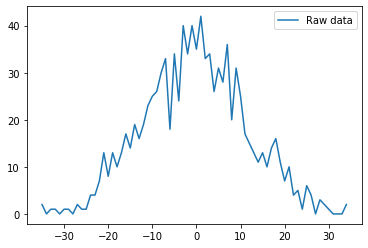

In [4]:
# Potential number one, the constant k is with betaAndK in getResult
@jit(nopython=True)
def V_1(x):
    return 1

plotResult(getResult(V_1,beta_k[0]))
#plotResult(getResult(V_1,beta_k[1]))
#plotResult(getResult(V_1,beta_k[2]))
## Ser at grafene til V_1 er uavh. av verdien til betaAndK, altså uavhengig av den termiske energien.
## Det er fordi at å plusse på en konstant til en random walk prosess er bare som å øke den totale energien for alle partiklene og vil ikke endre utfallet av prosessen, men kanskje tiden det tar. 
  

## Programming exercise 4.2:

[-200] [1000]


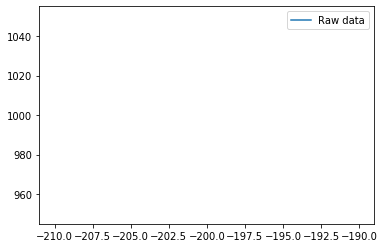

In [5]:
@jit(nopython=True)
def V_2(x):
    return x

plotResult(getResult(V_2,beta_k[2]))
#V_2 er en odde funksjon så partiklene vil minimere sn potensielle energi ved å gå mot lav potensiale. 
#Ved betaAndK = 0.01 ser man ikke så mye pga den termiske energien er stor i forhold til potensiale.
#Ved betaAndK = 1 ser man en sterk drifting mot venstre, altså at intensiteten av x-posisjoner er større mot venste og massepunktet forskjøvet.
#Ved betaAndK = 100 er potensialet veldig stort i forhold til den termiske energien og alle partiklene går til posisjon -200, da for å minimere sin potensielle energi.


## Programming exercise 4.3:


[-10  -9  -8] [178 770  52]


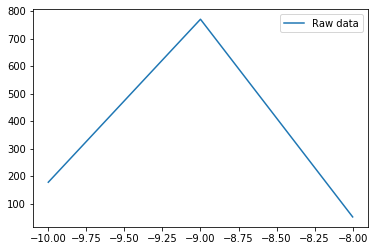

In [6]:
@jit(nopython=True)
def V_3(x):
    return ((x/20)+np.sin(x/5))

plotResult(getResult(V_3,beta_k[2]))
#Ved betaAndK = 0.01 er energien for stor og kommer seg opp av "gropene" i potensialet
#Ved betaAndK = 1 faller nesten alle partiklene i første gropen i potensialfunksjonen, da fordi den termiske energien ikke er stor nok til å komme ut. 
##Såpass konsentrert at det danner ish en normalfordeling inni gropen. Er ikke veldig konsentrert i dette tilfelle
#betaAndK = 100; Får ish 3 datapunkter der nesten alle partiklene er nøyaktig på bunnpunktet og de resterende er 1 eller 2 steglengder unna

## Programming exercise 4.4:


[0] [1000]


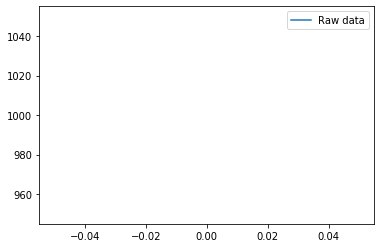

In [7]:
@jit(nopython=True)
def V_4(x):
    return x**2

plotResult(getResult(V_4,beta_k[2])) 
#betaAndK = 0.01; Er en jevn-funksjon der det minimale potensiale er i x=0. Her er det litt spredning, men mer konsentrert enn ved konstant potensiale
#betaAndK = 1; Blir bare mer og mer konentrert om x=0
#betaAndK = 100; Blir ett punkt i x=0. Dvs. alle partiklene er i samme posisjon x=0. 

# 5 Random walk in a ratchet potential

In [70]:
@jit(nopython=True)
def V_sawtooth(x): #V_1(x) i oppgaven
    #assert (-(1-alpha)*2*N_x < x <= alpha*2*N_x)
    if not (-(1-alpha)*N_x < x <= alpha*N_x): 
        x = x+N_x                #periodisk funksjon
    if (0 < x <= alpha*N_x):
        return x/(alpha*N_x) 
    else:
        return -1*(x/((1-alpha)*N_x))  #Tok ut k, samme som for opg. 4 der vi slo sammen betaAndK

@jit(nopython=True)  
def V_constant(x):
  #Constant function of x, magnitude not important. 
  #Therefore, we define it as 1
  c = 1
  return c
  
@jit(nopython=True)
def J(n_plus,n_minus): #Normalized particle current
    return (n_plus-n_minus)/N_p

#@jit(nopython=True)
def J_avg(current_list):
    '''
    Calculates the average current per cycle. 
    Returns a cycled average current. 
    '''
    average = sum(current_list)/len(current_list)
    
    return average
        

## 5.1 Programming exercise 5.1

In [73]:
#Constants
h = 1
alpha = 0.8 #Defines x-positions of the teeth's peaks
T_p = 500 #Time interval between excitation and de-excitation
delta_t = 1
betaK = 1000
N_x = 90  #Spatial period of V_1(x)
N_p = 12*N_x
cycles = 10
jumps = 2*cycles
#definerer 
x_first=-89          #Egt. x_0, men bruker det som variabel i alle andre funksjoner
x_last = 90          #Er x_179, x nrummer 179

@jit(nopython=True)
def p_minus_cycle(x_0, V, beta_k): #når x_0 = -89 er x_0-1=90, periodisk x-akse
    value = 0
    if x_0 == x_first:
        value = 1/(1+e**(-beta_k*(V(x_0+1)-V(x_last)))+e**(-beta_k*(V(x_0)-V(x_last))))
    elif x_0 == x_last:
        value = 1/(1+e**(-beta_k*(V(x_first)-V(x_0-1)))+e**(-beta_k*(V(x_0)-V(x_0-1))))
    else:
        value = 1/(1+e**(-beta_k*(V(x_0+1)-V(x_0-1)))+e**(-beta_k*(V(x_0)-V(x_0-1))))
    return value

@jit(nopython=True)
def p_plus_cycle(x_0, V, beta_k): #trenger en funksjon pga. periodisk x-akse
    value = 0
    if x_0 == x_first:
        value = 1/(1+e**(-beta_k*(V(x_last)-V(x_0+1)))+e**(-beta_k*(V(x_0)-V(x_0+1))))
    elif x_0 == x_last:
        value = 1/(1+e**(-beta_k*(V(x_0-1)-V(x_first)))+e**(-beta_k*(V(x_0)-V(x_first))))
    else:
        value = 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0+1)))+e**(-beta_k*(V(x_0)-V(x_0+1))))
    return value

@jit(nopython=True)
def fill_particles():
    '''
    Makes an array with N_p elements (particles) where each particle is evenly distributed 
    along the x-axis (has a value from -89 to 90)
    '''
    particles = np.zeros(N_p,dtype = np.int64)
    number = -89
    for i in range(1,len(particles)+1):
        particles[i-1] = number
        if i%6 == 0:
            number += 1
    return particles

@jit(nopython=True)
def getResultCurrent(V, betaAndK, init, time_steps):
    countPos = 0
    countNeg = 0
    current_list_per_time_step = []
    for step in range(time_steps):
        for position in range(len(init)):
            p = np.random.uniform(0,1)
            if p <= p_minus_cycle(init[position],V, betaAndK):
                if init[position] == x_first:
                    init[position] = x_last
                else:
                    init[position] -= 1
                    countNeg +=1
            elif p >= (1-p_plus_cycle(init[position],V, betaAndK)):
                if init[position] == x_last:
                    init[position] = x_first
                else:
                    init[position] += 1
                    countPos +=1
        current_list_per_time_step.append(J(countPos, countNeg))

    return init, countNeg, countPos, current_list_per_time_step

#@jit(nopython=True)
def getCurrentList(particles, V1, V2, T_p):
  #current_list = np.array([])
  average_currents = []
  #countPos = 0
  #countNeg = 0
  for i in range(jumps):
      if i%2 == 0:
          particles, neg, pos, currents_per_time_step = getResultCurrent(V2,betaK,particles,T_p)
          current_list = currents_per_time_step
          #countPos += pos
          #countNeg += neg
      else:
          particles, neg, pos, currents_per_time_step = getResultCurrent(V1,betaK,particles,T_p)
          current_list += currents_per_time_step
          
          #countPos += pos
          #countNeg += neg
          
          average_currents.append(J_avg(current_list))
          #current_list = []
  return average_currents

particles = fill_particles() #List of N_p particles uniformly distributed on the 2*N_x x-axis from -89 to 90
print(getCurrentList(particles,V_sawtooth, V_constant,T_p))





[-12.457514814814715, -6.871189814814768, -6.205524074074144, -6.00654351851848, -7.222438888888922, -7.02775648148141, -6.573733333333333, -7.267008333333281, -6.282945370370342, -7.591124074073981]


#### Why we get non-zero currents: 

* The potential is not symmetric, which means that there will be a current towards one of the sides. Furthermore, 

## Programming exercise 5.2

## Programming exercise 5.3

# 6 Analytical solution

## Programming exercise 6.1

## Programming exercise 6.2

## Programming exercise 6.3

## Exercise 6.4